# <div dir=rtl> תרגול רביעי - PCA & Clustering </div>


<div dir=rtl>
    בתרגול זה ראה דוגמה למימוש אלגוריתם קיבוץ על ידי חבילות בפייתון. 
    <br />
    מימושים כתובים מראש כמעט תמיד יהיו יותר אופטימליים ממימושים שאנחנו נכתוב בעצמינו לכן כדאי להכיר אותם.
</div>

## <div dir=rtl> שאלה 1 </div>
<div dir=rtl>
     בשנת 1995 קבוצת מחקר מאוניברסיטת וויסקונסין שחררה מידע על אודות 569 דגימות מנגעים ברקמת השד - חלקם ממאירים וחלקים שפירים. החוקרים הפיקו נתונים כמותיים אודות גרעיני התאים שנצפו בדגימה תחת המיקרוסקופ ומטרתם הייתה לפתח כלי אוטומטי לאיבחון ממאירות של הנגע.
    <br />
    המידע זמין להורדה בחבילה sklearn.
</div>

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

<div dir=rtl>
    <br />
    א. טענו את הקובץ לאובייקט מסוג DataFrame.
    <br />
    דיגמו ארבע רשומות באקראי מתוך המידע.
</div>

In [33]:
from sklearn import datasets
dataset = datasets.load_breast_cancer()

In [34]:
df = pd.DataFrame(
    
    dataset['data'],
    columns=dataset['feature_names']
    
)

df['diagnosis'] = dataset['target'] 
df.sample(4)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
253,17.30,17.08,113.00,928.2,0.10080,0.10410,0.12660,0.08353,0.1813,0.05613,...,25.09,130.90,1222.0,0.14160,0.24050,0.3378,0.18570,0.3138,0.08113,0
447,14.80,17.66,95.88,674.8,0.09179,0.08890,0.04069,0.02260,0.1893,0.05886,...,22.74,105.90,829.5,0.12260,0.18810,0.2060,0.08308,0.3600,0.07285,1
192,9.72,18.22,60.73,288.1,0.06950,0.02344,0.00000,0.00000,0.1653,0.06447,...,20.83,62.25,303.8,0.07117,0.02729,0.0000,0.00000,0.1909,0.06559,1
555,10.29,27.61,65.67,321.4,0.09030,0.07658,0.05999,0.02738,0.1593,0.06127,...,34.91,69.57,357.6,0.13840,0.17100,0.2000,0.09127,0.2226,0.08283,1


<div dir=rtl>
    ב. חקרו את המידע הנתון. בחקירה התייחסו להתפלגות האיבחון ולהתפלגות הפיצ'רים.
</div>

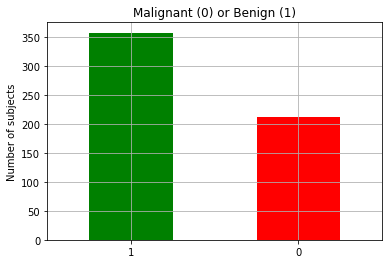

In [35]:
barp = df['diagnosis'].value_counts().plot.bar(
    grid=True,
    rot=0,
    title='Malignant (0) or Benign (1)',
    color=['g','r']
)

barp_label = barp.set(ylabel='Number of subjects')

<div dir=rtl>
    קיבלנו חוסר איזון בין המחלקות השונות בדאטא. זה עלול להיות משמעותי בהתאם למודל שלנו.
    <br />
    נחקור את הפיצ'רים כעת. לצורך נוחות הצפייה נהפוך את הטבלה - נגרום לאינדקס להפוך לעמודות - ואת זה עושים על ידי פעולת הטרנספוז.
</div>

In [36]:
df.describe().T[['count','mean','std','min','max']]

,count,mean,std,min,max
mean radius,569.0,14.127292,3.524049,6.981000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.09744


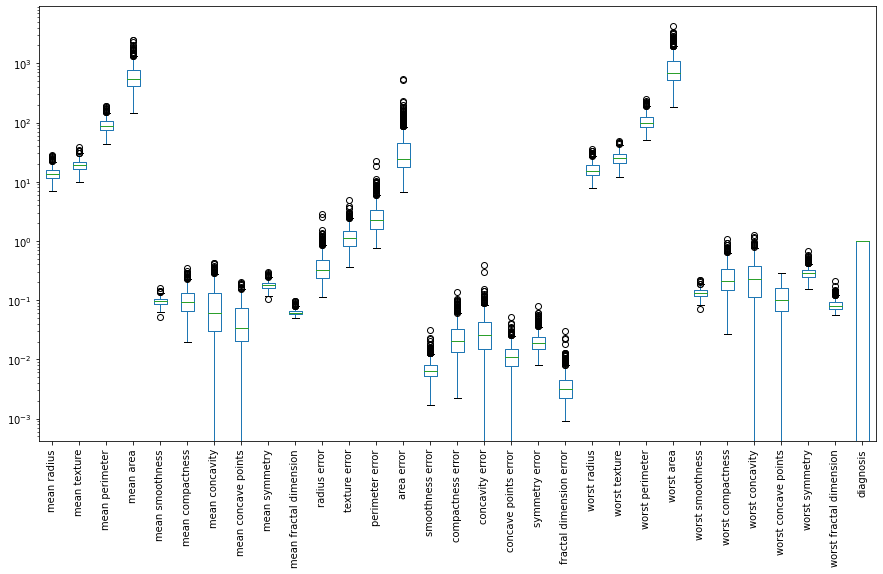

In [38]:
bplot = df.plot(
    figsize=(15,8),
    kind='box',
    rot=90,
    logy=True
)

<div dir=rtl>
    לבסוף נחקור את היחסים בין הפיצ'רים.
    <br />
    קיימות הרבה מאוד שיטות בחירת פיצ'רים. בתרגול הזה נלמד אחת מהן - אפיון פיצ'רים על ידי קורלציה.
    <br />
    למזלינו פנדס מאפשרת בידקת הקורלציה בין כל זוג פיצ'רים בטבלה על ידי מתודה אחת:
</div>

<a href='https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html'>DataFrame.corr
</a>
<div dir=rtl>
    <br />
    ברירת המחדל של הפונקציה היא מציאת הקורלציה על פי פירסון. 
    <br />
    זוג פיצ'רים יכול להיות קורלטיבי במיוחד - כמו למשל שטח ורדיוס באובייקט כדורי כמו גידול - ואז אחד מהם לא מוסיף מידע.
</div>

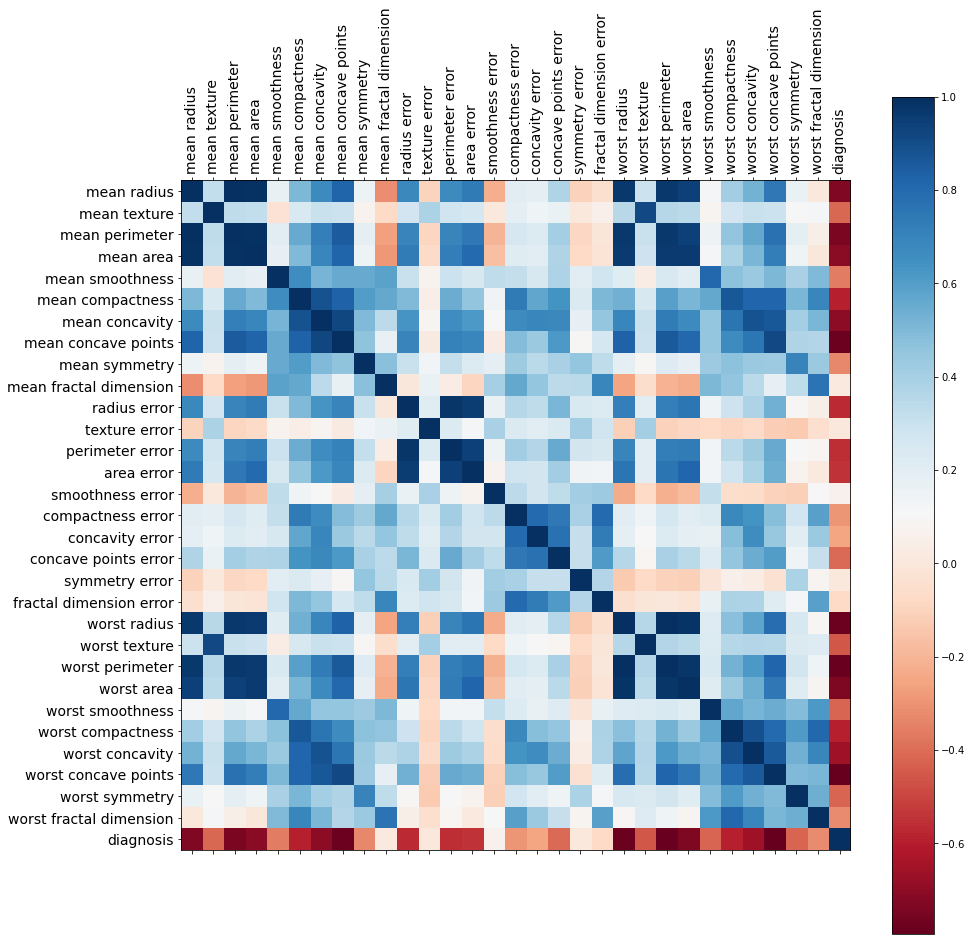

In [39]:
fig = plt.figure(figsize=(15,15))
cor_df = df.corr()

corp = plt.matshow(
    cor_df,
    fignum=fig.number,
    cmap='RdBu'
)

plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)

cb = plt.colorbar()

<div dir=rtl>
    <code>matshow</code> - מציג מטריצה בצורה טבלאית (ממש כמו ״פיקסלים״)
</div>


<div dir=rtl>
    ג. קבצו את הנבדקים על ידי שימוש באלגוריתם קלאסטרינג. האם ניתן לסווג את הנבדקים לפי אלגוריתם הקיבוץ? מה תהיה השגיאה אם ננסה?
    <br />
    ראשית נבחן את המטריצה מעל ונבין שהרה פיצ'רים לא מוסיפים מידע - הם קורלטיביים אחד עם השני. דבר שני שנבין הוא שהמידע שלנו קיים במרחב בעל 30 מימדים - עודף מימדי.
    <br />
    נבחר שלושה מימדים איתם נעבוד. נבחר אותם כך שיהיו כמה שפחות קורלטיביים אחד עם השני.
</div>

In [40]:
selected_columns = ['mean smoothness', 'mean radius','mean symmetry']
fig = plt.figure(figsize=(5,4))
cor_df.loc[selected_columns,selected_columns]


,mean smoothness,mean radius,mean symmetry
mean smoothness,1.000000,0.170581,0.557775
mean radius,0.170581,1.000000,0.147741
mean symmetry,0.557775,0.147741,1.000000


<Figure size 360x288 with 0 Axes>

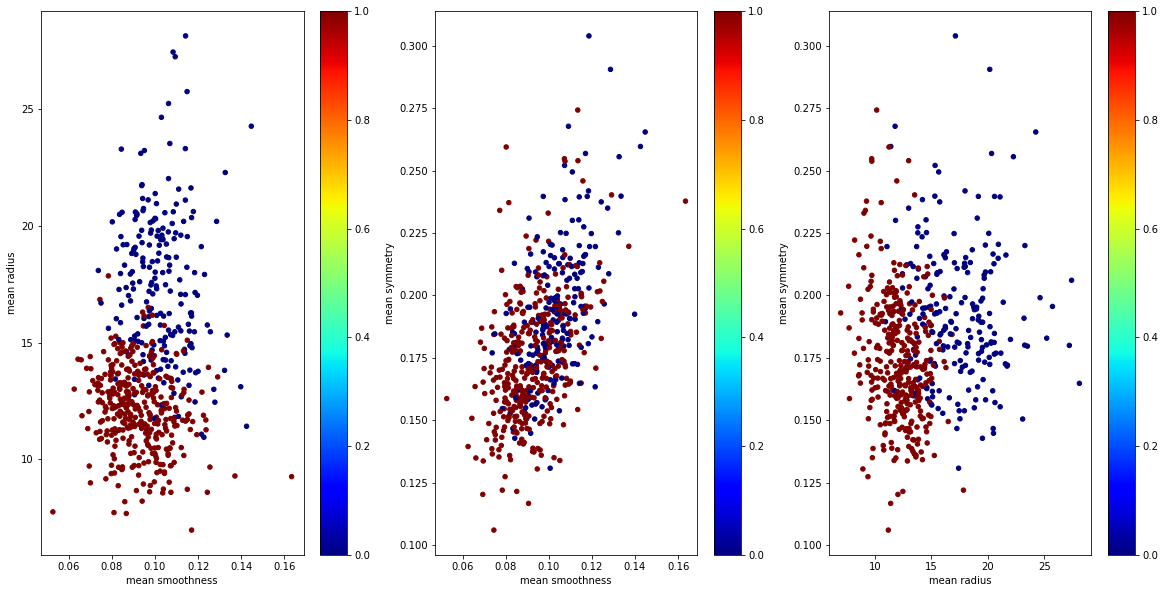

In [41]:
from pyplot_display_helper import output_multi_scatter

output_multi_scatter(df, selected_columns)

<div dir=rtl>
    כעת נטפל בבעיה אותה צפינו לפני כן - הפיצ'רים שוכנים בטווחים שונים מאוד אחד מהשני (שימו לב לסדרי הגודל בצירים למעלה)
    <br / >
    ננרמל כל עמודה על ידי החסרת הממוצע ממנה וחלוקה בסטיית תקן שלה. למזלינו פנדס מאפשר לבצע זאת באופן טריויאלי:
</div>

In [42]:
df_diagnosis = df['diagnosis']

df = (df - df.mean()) / (df.std() + 1e-10)

df['diagnosis'] = df_diagnosis
df.sample(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
30,1.277709,1.353244,1.351125,1.230729,0.713853,1.597323,1.795046,1.945240,1.354700,-0.117219,...,1.355748,1.584368,1.386506,0.732791,1.089607,1.635052,1.067873,0.878077,0.768173,0
59,-1.563341,-1.743684,-1.548585,-1.222995,0.082459,-0.977434,-0.855362,-1.059720,-0.469167,1.284975,...,-1.672111,-1.409453,-1.063802,1.792687,-0.828575,-0.744825,-1.071257,0.516013,0.349598,1
523,-0.118413,-0.141745,-0.133299,-0.238379,0.199068,0.050348,-0.438402,-0.285782,-0.356087,0.797748,...,-0.007683,-0.233054,-0.313833,0.443729,0.014841,-0.377178,0.209848,-0.083656,0.352366,1
506,-0.541222,0.174458,-0.514385,-0.573404,0.941382,0.205613,-0.088426,-0.702504,1.139484,0.869982,...,-0.245226,-0.658617,-0.641571,0.342995,-0.144690,0.389751,-0.513084,-0.309946,0.246062,1
561,-0.830662,2.343703,-0.876540,-0.764076,-1.555040,-1.301977,-1.113893,-1.260710,-2.741705,-1.101588,...,2.053734,-0.954428,-0.774528,-1.738693,-1.266871,-1.304683,-1.743529,-2.157444,-1.378409,1


<div dir=rtl>
    מעל "שמנו בצד" את העמודה של האבחנה - אנחנו לא רוצים לנרמל אותה.
    <br />
    נראה שוב את המידע שלנו על מערכת צירים:
</div>

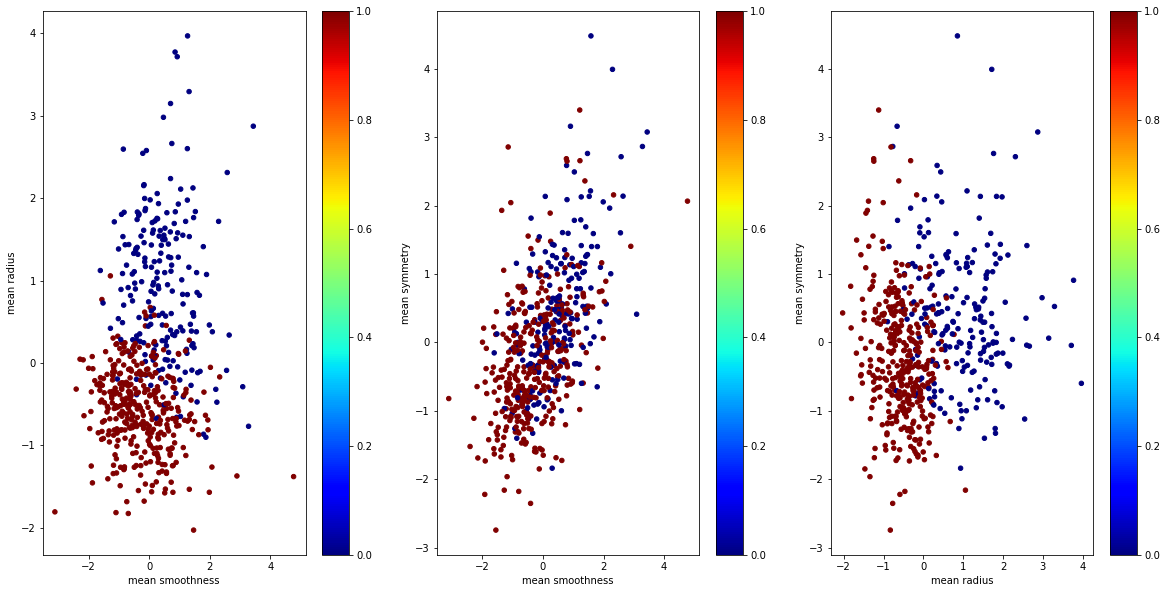

In [43]:
output_multi_scatter(df, selected_columns)

<div dir=rtl>
    נתחיל לקבץ. נשתמש באלגוריתם KMeans.
    יתרונות: פשוט וקל להבנה וכך גם המשמעות של המקבצים; מתכנס בוודאות; הוספת דגימות חדשות היא פשוטה, גם בשלב האימון וגם בשלב ההסקה. חסרונות: מניח הנחות מסוימות ובראשן - שהמקבצים רדיאליים; רגיש לתנאי ההתחלה; מושפע על ידי אוטליארים; מספר המקבצים הסופי הוא פרמטר הנקבע מראש.
</div>

In [44]:
from sklearn.cluster import KMeans

In [45]:
kmeans_model_3d = KMeans(
    n_clusters = 2
)

<div dir=rtl>
    למעלה יצרנו אובייקט קיבוץ עם שני מקבצים. נעביר לו את המידע ונאמן אותו. בשלב האימון "נזרקים" שני מרכזים למערכת הצירים. באופן איטרטיבי: לכל נקודה מוצאים את המרכז הקרוב אליה ומשייכים את הנקודה למרכז. לכל הנקודות השייכות לאותו מרכז מחשבים ממוצע. מזיזים את המרכז לממוצע הנקודות השייכות אליו. ממשיכים עד שאין שינוי בשיוך הנקודות למרכזים.
</div>

In [46]:
kmeans_model_3d.fit(
    df.loc[:,selected_columns]
)

KMeans(n_clusters=2)

In [47]:
kmeans_model_3d.cluster_centers_

array([[-0.52990276, -0.41165666, -0.49511662],
       [ 0.7983557 ,  0.62020519,  0.74594663]])

In [48]:
kmeans_model_3d.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

<div dir=rtl>
    קיבלנו שני מקבצים ובהתאם ווקטור מספרי עם שני ערכים - 0 המקבץ הראשון 1- המקבץ השני.
    <br />
    נשים לב שאין משמעות למספרים עצמם בווקטור. למקבץ אין "שם". בהרצה אחרת היינו עלולים לקבל היפוך של המספרים (איפה שמופיע 1 יהיה אפס ולהפך) והקיבוץ עדיין היה נכון.
</div>

In [49]:
df['kmeans 3d output'] = kmeans_model_3d.labels_
df.sample(5)[['diagnosis', 'kmeans 3d output']]

,diagnosis,kmeans 3d output
456,1,0
313,1,0
77,0,1
78,0,1
37,1,0


In [50]:
CM = pd.DataFrame(
    df.groupby(['diagnosis','kmeans 3d output']).size(),
    columns = [' ']
)
CM

diagnosis kmeans 3d output     
0         0                  45
          1                 167
1         0                 297
          1                  60

<div dir=rtl>
    כאן קיבלנו טבלה עם שני אינדקסים. מתודה המעבירה אינדקס לעמודה היא unstack.
    <br />
    מתודה המעבירה עמודה לאינדקס - stack.
</div>

In [51]:
CM = CM.unstack(level=0)
CM

diagnosis           0    1
kmeans 3d output          
0                  45  297
1                 167   60

In [52]:
CM_percent = (CM / CM.sum(axis='index') * 100).round(2)
CM_percent

diagnosis             0      1
kmeans 3d output              
0                 21.23  83.19
1                 78.77  16.81

<div dir=rtl>
    ד. אחת המהנדסות בצוות טענה שניתן להפחית את החישוביות, להוריד קורלציות בנתונים ולשפר את הקיבוץ. האם זה נכון?
    <br /><br />
    לא תמיד. במקרה הזה אנחנו עובדים עם דאטא תלת מימדי ואפשר לראות למעלה שקיימת קורלציה חלקית בין שניים מהפיצ'רים. בנוסף נזכור שככל שאנחנו עולים מימדים משימת הקיבוץ נהית יותר קשה. ננסה להוריד מימד על ידי PCA.
    <br / >
    יתרונות: עוזר להתמודד עם קללת המימדים; מצמצם מימדים למידע החיוני בהם; עוזר להיפטר מרעש. חסרון מרכזי: הצירים מאבדים משמעות פיזיקלית.
</div>

In [53]:
from sklearn.decomposition import PCA

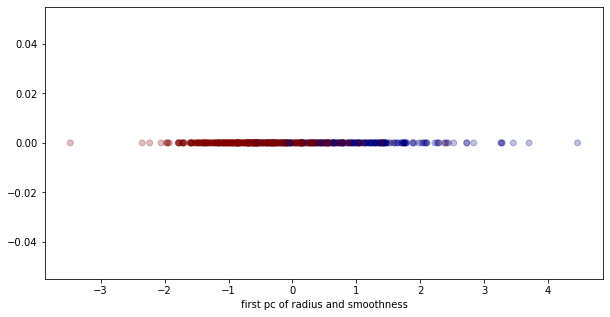

In [54]:
pca = PCA(n_components=1)
pca.fit(df[['mean radius','mean smoothness']])

df['first pc of radius and smoothness'] = pca.transform(df[['mean radius','mean smoothness']])

plt.figure(figsize=(10,5))
plt.scatter(
    df['first pc of radius and smoothness'],
    [np.zeros(df['first pc of radius and smoothness'].shape)],
    c=df['diagnosis'], 
    cmap='jet',
    alpha=0.25
)
xlabel = plt.xlabel('first pc of radius and smoothness')



<div dir=rtl>
    למעלה קיבלנו למעשה "ציר אחד" המכיל מידע משני המימדים. נשרטט כעת את הנקודות שלנו (שבעבר היו תלת מימדיות) על מישור:
</div>

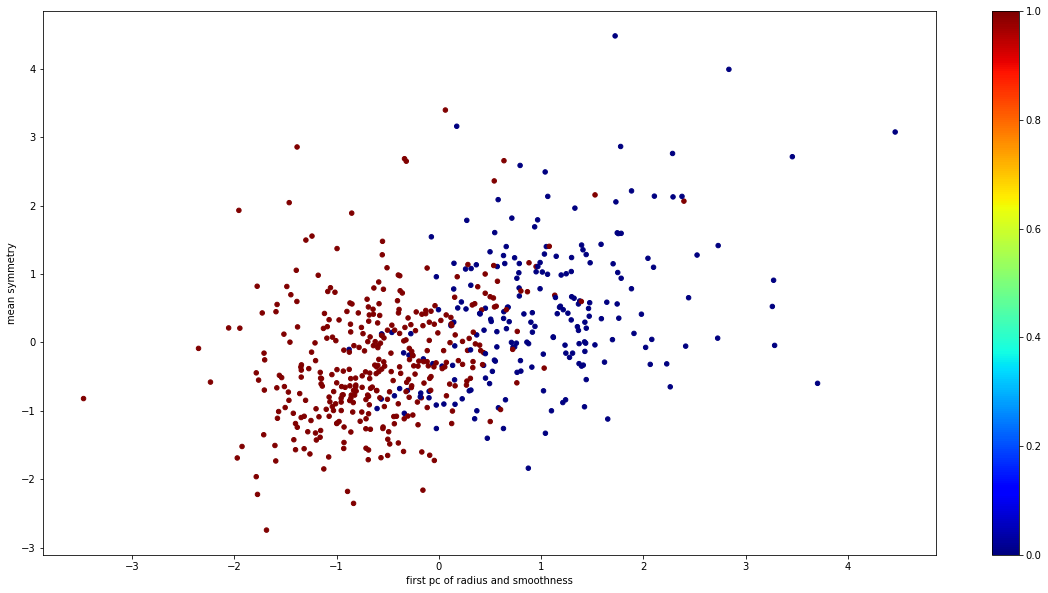

In [55]:
output_multi_scatter(df, ['first pc of radius and smoothness', 'mean symmetry'])

<div dir=rtl>
    נחזור על פעולת הקיבוץ כעת:
</div>

In [56]:
kmeans_model_2d = KMeans(
    n_clusters = 2
)

kmeans_model_2d.fit(
    df.loc[:,['mean symmetry', 'first pc of radius and smoothness']]
)

df['kmeans 2d output'] = kmeans_model_2d.labels_

CM = pd.DataFrame(
    df.groupby(['diagnosis','kmeans 2d output']).size(),
    columns = [' ']
).unstack(level=0)
CM

diagnosis           0    1
kmeans 2d output          
0                  42  304
1                 170   53

In [57]:
CM_percent = (CM / CM.sum(axis='index') * 100).round(2)
CM_percent

diagnosis             0      1
kmeans 2d output              
0                 19.81  85.15
1                 80.19  14.85

<div dir=rtl>
    יתרון משמעותי של הורדת מימדים לדו- או תלת-מימד הוא שניתן לשרטט אותו:
</div>

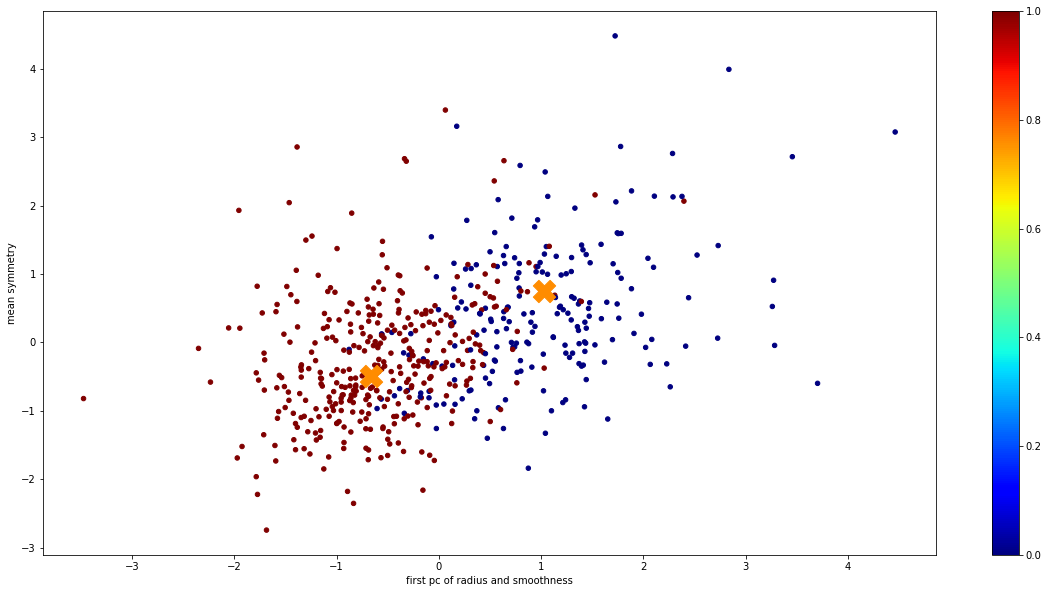

In [58]:
output_multi_scatter(df, ['first pc of radius and smoothness', 'mean symmetry'])

scatp = plt.scatter(
    kmeans_model_2d.cluster_centers_[:,1],
    kmeans_model_2d.cluster_centers_[:,0], 
    marker='X',
    c='darkorange',
    s=500,
)

<div dir=rtl>
    לבסוף נבחין במשהו מעניין - כשאנחנו מבצעים PCA מוחזר לנו ווקטור שונות מוסברת.
    <br />
    נבצע PCA על כל הנתונים שבידינו (ולא רק על אלה שבחרנו על סמך קורלציה):
</div>

In [59]:
pca_all_features = PCA(n_components=None)

pca_all_features.fit(
    df.drop(
        ['diagnosis',
         'kmeans 3d output', 
         'first pc of radius and smoothness', 
         'kmeans 2d output']
        ,axis='columns'
    )
)
pca_all_features.explained_variance_ratio_

array([4.42720259e-01, 1.89711819e-01, 9.39316321e-02, 6.60213498e-02,
       5.49576845e-02, 4.02452201e-02, 2.25073370e-02, 1.58872377e-02,
       1.38964937e-02, 1.16897818e-02, 9.79718985e-03, 8.70537893e-03,
       8.04524982e-03, 5.23365742e-03, 3.13783214e-03, 2.66209336e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925307e-03, 1.03864675e-03,
       9.99096472e-04, 9.14646750e-04, 8.11361261e-04, 6.01833571e-04,
       5.16042382e-04, 2.72587998e-04, 2.30015464e-04, 5.29779296e-05,
       2.49601035e-05, 4.43482747e-06])

<div dir=rtl>
    נשרטט את הווקטור כפונקציה של מסרפר הקומפוננטות:
</div>

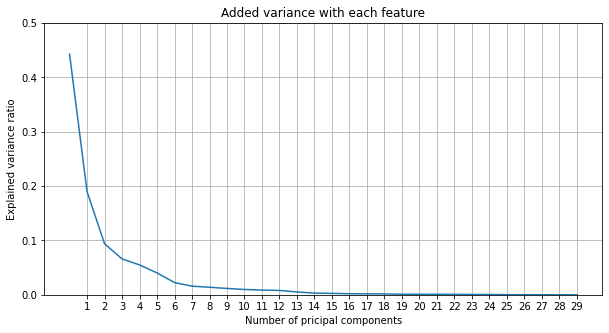

In [60]:
plt.figure(figsize=(10,5))
plt.plot(
    np.arange(len(pca_all_features.explained_variance_ratio_)),
    pca_all_features.explained_variance_ratio_,
)
plt.xticks(np.arange(1,len(pca_all_features.explained_variance_ratio_)))

plt.grid(True)
plt.ylim([0,0.5])
plt.xlabel('Number of pricipal components')
plt.ylabel('Explained variance ratio')
plt.title('Added variance with each feature')
plt.show()

<div dir=rtl>
    הקומפוננטות הן הווקטורים העצמיים של מטריצת השונות המשותפת של כל הפיצ'רים (אחרי נרמול לווקטורי יחידה). הערך העצמי המתאים לכל ווקטור עצמי מייצג את "תרומת" הווקטור העצמי למטריצת השונות. ניתן לסדר את הווקטורים העצמיים לפי התרומה לשונות בדאטא - וזה אכן נעשה בפלט של האלגוריתם.
    <br />
    ניתן לראות למעלה כי 
    <b>עבור הדאטא הנוכחי בנרמול הנוכחי </b>
    ניתן להסביר כ45% מכלל השונות בדאטא על ידי הקומפוננטה הראשונה ועוד כ20% מהשונות על ידי הקומפוננטה השנייה. החל מאיזשהו שלב כל קומפוננטה נוספת מוסיפה יחסית מעט מידע נוסף ויש לתהות אם הוא חשוב ואולי אפילו רעש.
</div>

In [ ]:
%ls

In [ ]:
with open('pyplot_display_helper.py', 'r') as f:
    print(f.read())